<a href="https://colab.research.google.com/github/nafisenik/DataMinig_pySpark/blob/main/question_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Question 3

In [1]:
!pip install apyori

### Import libraries

In [2]:
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np
import pandas as pd
import numpy as np
from apyori import apriori
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

### Read our data

In [3]:
#'http://snap.stanford.edu/class/cs246-data/browsing.txt'
text_file = open("browsing.txt", "r")
lines = text_file.readlines()
#lines = text_file.read().split(' ')

text_file.close()

In [4]:
with open("browsing.txt") as file_in:
  baskets = []
  for line in file_in:
      #print(line)
      spilited_item = line.split()
      #print(spilited_item)
      baskets.append(spilited_item)

In [5]:
unique_baskets = []
for l in baskets:
  x = list(set(l))
  unique_baskets.append(x)

In [6]:
unique_baskets[0]

['GRO99222', 'SNA90258', 'ELE17451', 'ELE89019', 'FRO11987']

### Word cloud of our data

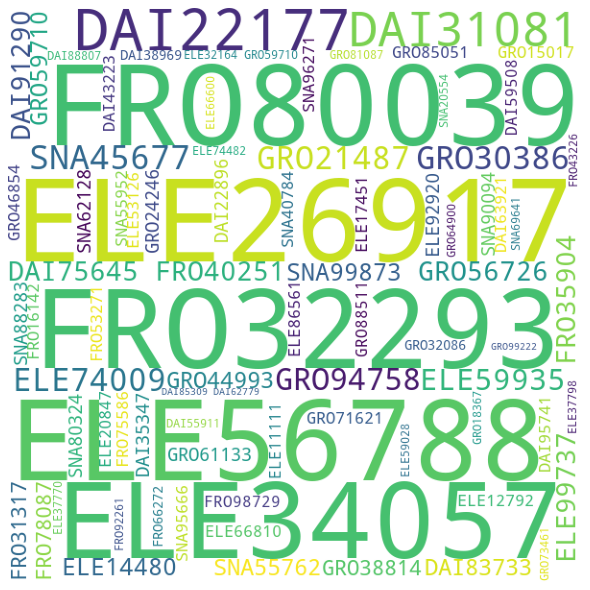

In [7]:
flat_basket = [ item for elem in unique_baskets for item in elem]
item_basket = " ".join(flat_basket)
 
wordcloud = WordCloud(width = 600, height = 600,
                background_color ='white',
                min_font_size = 10).generate(item_basket)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Create our model

In [8]:
rules = apriori(unique_baskets, min_support=0.003, min_confidance=0.2, min_lift=3, min_length=2)


### Convert rules to Data frame

In [9]:
extracted_rules = list(rules)
df = pd.DataFrame(extracted_rules)
df.head()

,items,support,ordered_statistics
0,"(DAI16732, FRO78087)",0.003408,"[((DAI16732), (FRO78087), 0.5668449197860962, ..."
1,"(SNA44451, DAI18527)",0.003280,"[((DAI18527), (SNA44451), 0.3805970149253731, ..."
2,"(ELE37048, DAI22240)",0.007042,"[((DAI22240), (ELE37048), 0.36683417085427134,..."
3,"(DAI22240, ELE74482)",0.003312,"[((DAI22240), (ELE74482), 0.17252931323283083,..."
4,"(DAI22896, GRO38814)",0.007170,"[((DAI22896), (GRO38814), 0.18293683347005743,..."


### Print our rules

In [17]:
for x in range(len(extracted_rules)):
  my_str_list = str([x for x in extracted_rules[x][0]])
  print(f'Rule {x} --->'+ my_str_list)

Rule 0 --->['DAI16732', 'FRO78087']
Rule 1 --->['SNA44451', 'DAI18527']
Rule 2 --->['ELE37048', 'DAI22240']
Rule 3 --->['DAI22240', 'ELE74482']
Rule 4 --->['DAI22896', 'GRO38814']
Rule 5 --->['DAI22896', 'SNA72163']
Rule 6 --->['DAI23334', 'DAI62779']
Rule 7 --->['ELE92920', 'DAI23334']
Rule 8 --->['GRO56989', 'DAI31081']
Rule 9 --->['GRO69543', 'DAI31081']
Rule 10 --->['DAI35347', 'ELE66810']
Rule 11 --->['DAI35347', 'FRO31317']
Rule 12 --->['ELE32164', 'DAI37288']
Rule 13 --->['DAI38969', 'FRO19671']
Rule 14 --->['DAI42083', 'DAI92600']
Rule 15 --->['DAI42083', 'GRO59710']
Rule 16 --->['DAI42083', 'SNA59903']
Rule 17 --->['DAI42493', 'ELE92920']
Rule 18 --->['GRO59710', 'DAI42493']
Rule 19 --->['SNA18336', 'DAI42493']
Rule 20 --->['ELE32164', 'DAI43223']
Rule 21 --->['FRO99372', 'DAI43223']
Rule 22 --->['GRO59710', 'DAI43223']
Rule 23 --->['DAI43868', 'SNA82528']
Rule 24 --->['FRO81176', 'DAI46755']
Rule 25 --->['ELE78169', 'DAI48891']
Rule 26 --->['GRO36567', 'DAI48891']
Rule 27 ---

### Support, Confidence and Lift parameters for each rule

In [30]:
STR_SEP = '*'*30
def statistical_info(rules_set):
  index = 0
  for rule in rules_set:
    print(STR_SEP + f'Rule {index}' + STR_SEP )
    my_str_list = '  '.join([x for x in rules_set[x][0]])
    print('Items ---> ' + my_str_list)
    print("Support  ---> " + str(rule[1]))
    print("Confidence ---> " + str(rule[2][0][2]))
    print("Lift ---> " + str(rule[2][0][3]))
    index += 1
  

In [31]:
statistical_info(extracted_rules)

******************************Rule 0******************************
Items ---> SNA80324  FRO40251  DAI62779  GRO85051  ELE17451
Support  ---> 0.0034082505385678915
Confidence ---> 0.5668449197860962
Lift ---> 11.514986185674315
******************************Rule 1******************************
Items ---> SNA80324  FRO40251  DAI62779  GRO85051  ELE17451
Support  ---> 0.003279637310697405
Confidence ---> 0.3805970149253731
Lift ---> 67.63970149253731
******************************Rule 2******************************
Items ---> SNA80324  FRO40251  DAI62779  GRO85051  ELE17451
Support  ---> 0.007041574225909134
Confidence ---> 0.36683417085427134
Lift ---> 14.225573002167947
******************************Rule 3******************************
Items ---> SNA80324  FRO40251  DAI62779  GRO85051  ELE17451
Support  ---> 0.003311790617665027
Confidence ---> 0.17252931323283083
Lift ---> 4.077381588795039
******************************Rule 4******************************
Items ---> SNA80324  FRO4025

--------------------
